In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler , LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('new_train_data.csv')

#df = pd.read_csv('database/d1.csv')
#train, test = train_test_split(df,  test_size=0.2, random_state=42)

In [3]:
train_df['Dopant'] = train_df['Dopant'].str.strip()
train_df['Pollutant'] = train_df['Pollutant'].str.strip()

In [4]:
x_train = train_df.loc[:, ['Dopant/Ti mole ratio', 'Calcination temperature',
                           'Catalyst/Pollutant mass ratio', 'pH',
                           'Experimental temperature', 'Light wavelength', 'Illumination time']].values

In [5]:
scaler = StandardScaler()

In [6]:
x_train = scaler.fit_transform(x_train)

In [7]:
le_dopant = LabelEncoder().fit(train_df['Dopant'])
n_Dopant = len(np.unique(train_df['Dopant'].values))
Dopant_train = to_categorical(le_dopant.transform(train_df['Dopant']) , n_Dopant)

In [8]:
le_Pollutant = LabelEncoder().fit(train_df['Pollutant'])
n_Pollutant = len(np.unique(train_df['Pollutant'].values))
Pollutant_train = to_categorical(le_Pollutant.transform(train_df['Pollutant']) , n_Pollutant)

In [9]:
x_train = np.concatenate([x_train, Dopant_train, Pollutant_train],axis=1)

In [10]:
y_train = train_df['Degradation rate'].values

In [11]:
test_df = pd.read_csv('database/d2.csv')
test_df['Dopant'] = test_df['Dopant'].str.strip()
test_df['Pollutant'] = test_df['Pollutant'].str.strip()

In [12]:
x_test = test_df.loc[:, ['Dopant/Ti mole ratio', 'Calcination temperature',
                           'Catalyst/Pollutant mass ratio', 'pH',
                           'Experimental temperature', 'Light wavelength', 'Illumination time']].values

In [13]:
x_test = scaler.transform(x_test)

In [14]:
Dopant_test = to_categorical(le_dopant.transform(test_df['Dopant']) , n_Dopant)
Pollutant_test = to_categorical(le_Pollutant.transform(test_df['Pollutant']) , n_Pollutant)

In [15]:
x_test = np.concatenate([x_test, Dopant_test, Pollutant_test],axis=1)

In [16]:
y_test = test_df['Degradation rate'].values

In [17]:
_init = tf.keras.initializers.GlorotNormal()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer=_init, bias_initializer=_init),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer=_init, bias_initializer=_init),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer=_init, bias_initializer=_init),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer=_init, bias_initializer=_init),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)  
])

C:\Users\SERVER\anaconda3\envs\pymatgen\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [18]:
model.compile(optimizer = optimizers.Adam(1e-4 , beta_1=0.5,  beta_2=0.9), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [19]:
es = tf.keras.callbacks.EarlyStopping('val_loss', mode='min', patience=100 , restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/1000


25/25 [==============================] - 2s 12ms/step - loss: 4656.0840 - mean_absolute_error: 62.1175 - val_loss: 4818.2334 - val_mean_absolute_error: 65.9384
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: 4648.0122 - mean_absolute_error: 62.1052 - val_loss: 4835.1323 - val_mean_absolute_error: 66.0805
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 4645.1885 - mean_absolute_error: 62.0683 - val_loss: 4841.1528 - val_mean_absolute_error: 66.1386
Epoch 4/1000
25/25 [==============================] - 0s 6ms/step - loss: 4631.4663 - mean_absolute_error: 61.9806 - val_loss: 4844.2705 - val_mean_absolute_error: 66.1802
Epoch 5/1000
25/25 [==============================] - 0s 6ms/step - loss: 4626.5464 - mean_absolute_error: 62.0101 - val_loss: 4837.7432 - val_mean_absolute_error: 66.1553
Epoch 6/1000
25/25 [==============================] - 0s 6ms/step - loss: 4616.7207 - mean_absolute_error: 62.0019 - val_loss: 4834.5713 

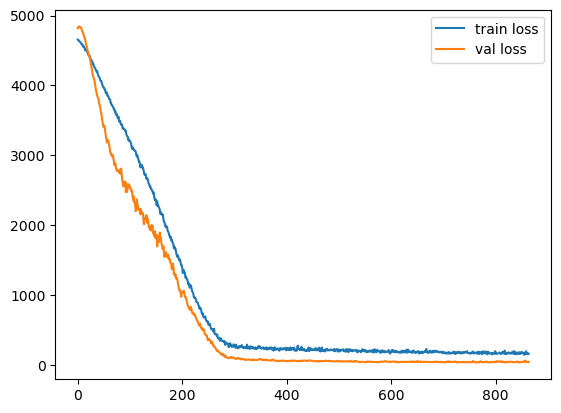

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss' , 'val loss'])
plt.show()
#plt.savefig('p.png')
plt.close()

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
ypred = model.predict(x_test).flatten()
#pred = model.predict(test.values)
r = r2_score(ypred,y_test)
print('MSE', mean_squared_error(ypred, y_test))
print('MAE', mean_absolute_error(ypred, y_test))
print('R2' , r)

1/1 [==============================] - 0s 101ms/step
MSE 36.65685815048269
MAE 4.559796308434528
R2 0.9220906654581527


In [22]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,ypred)
plt.ylim((-4,110))
x = [0,100] 
y = x
r=0.94
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot(x,y,color = 'grey',linewidth = '3',linestyle='--')
plt.legend(labels=['y=x', f"$R^2$={r:.2f}"],fontsize=20)
plt.xlabel('Degradation rate(%)-Experimental',fontsize=20)
plt.ylabel('Degradation rate(%)-Predicted',fontsize=20)
plt.savefig('a.jpg',bbox_inches = 'tight', dpi=600)
plt.savefig('p.png')
plt.close()
plt.show()

In [23]:
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
y_major_locator=MultipleLocator(20)

In [24]:
ypred.shape

(23,)

In [25]:
plt.figure(figsize=(8,5))
plt.xlim((0,103))
plt.ylim((-59.99, 59.99))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.scatter(ypred,ypred - y_test)
plt.axhline(y=0,ls=":",c="grey")
plt.legend(labels=['y=0' ,f"Test $R^2$={r:.2f}"],fontsize=20)
ax = plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
plt.xlabel('Predicted values for degradation rate(%)',fontsize=20)
plt.ylabel('Residuals',fontsize=20)
plt.savefig('b.jpg',bbox_inches = 'tight', dpi=600)
plt.close()

In [26]:
# model.save('model.h5')